In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

In [21]:
#변수엑셀보면 편의를 위해 날짜랑 단위 제거
data = pd.read_excel("변수18-22.xlsx")
data.head()

,PM10,오존,이산화질소,일산화탄소,아황산가스,평균기온,일강수량,평균풍속,평균 상대습도,평균 현지기압
0,33,0.015,0.029,0.6,0.005,-1.3,0.0,1.4,39.1,1016.8
1,32,0.012,0.036,0.8,0.005,-1.8,0.0,1.8,42.0,1018.1
2,30,0.018,0.021,0.5,0.005,-4.7,0.0,2.2,42.3,1019.9
3,39,0.009,0.036,0.7,0.005,-4.7,0.0,1.4,43.0,1016.5
4,48,0.006,0.044,0.8,0.005,-3.0,0.0,1.7,48.4,1010.3


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM10     1819 non-null   int64  
 1   오존       1819 non-null   float64
 2   이산화질소    1819 non-null   float64
 3   일산화탄소    1819 non-null   float64
 4   아황산가스    1819 non-null   float64
 5   평균기온     1819 non-null   float64
 6   일강수량     1819 non-null   float64
 7   평균풍속     1819 non-null   float64
 8   평균 상대습도  1819 non-null   float64
 9   평균 현지기압  1819 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 142.2 KB


In [23]:
data.describe().round(3)

,PM10,오존,이산화질소,일산화탄소,아황산가스,평균기온,일강수량,평균풍속,평균 상대습도,평균 현지기압
count,1819.000,1819.000,1819.000,1819.000,1819.000,1819.000,1819.000,1819.000,1819.000,1819.000
mean,35.314,0.026,0.027,0.495,0.003,13.403,3.727,2.144,61.511,1006.192
std,20.545,0.013,0.012,0.160,0.001,10.584,13.354,0.696,15.155,8.021
min,3.000,0.001,0.007,0.200,0.001,-14.900,0.000,0.600,17.900,983.100
25%,21.000,0.017,0.018,0.400,0.003,5.000,0.000,1.700,50.400,999.800
50%,31.000,0.026,0.025,0.500,0.003,14.000,0.000,2.000,61.400,1006.400
75%,45.000,0.035,0.035,0.600,0.004,22.750,0.300,2.500,71.800,1012.550
max,150.000,0.077,0.077,1.400,0.009,33.700,176.200,6.000,99.300,1026.800


In [24]:
#피어슨 상관계수
corr = data.corr(method = 'pearson').round(2)
corr

,PM10,오존,이산화질소,일산화탄소,아황산가스,평균기온,일강수량,평균풍속,평균 상대습도,평균 현지기압
PM10,1.00,-0.08,0.59,0.67,0.52,-0.29,-0.20,-0.15,-0.20,0.27
오존,-0.08,1.00,-0.47,-0.44,-0.07,0.46,-0.09,0.21,-0.07,-0.47
이산화질소,0.59,-0.47,1.00,0.85,0.59,-0.29,-0.10,-0.53,-0.17,0.38
일산화탄소,0.67,-0.44,0.85,1.00,0.55,-0.42,-0.13,-0.40,-0.11,0.41
아황산가스,0.52,-0.07,0.59,0.55,1.00,-0.22,-0.17,-0.25,-0.28,0.23
평균기온,-0.29,0.46,-0.29,-0.42,-0.22,1.00,0.18,-0.14,0.45,-0.78
일강수량,-0.20,-0.09,-0.10,-0.13,-0.17,0.18,1.00,0.10,0.46,-0.28
평균풍속,-0.15,0.21,-0.53,-0.40,-0.25,-0.14,0.10,1.00,-0.01,-0.09
평균 상대습도,-0.20,-0.07,-0.17,-0.11,-0.28,0.45,0.46,-0.01,1.00,-0.52
평균 현지기압,0.27,-0.47,0.38,0.41,0.23,-0.78,-0.28,-0.09,-0.52,1.00


In [25]:
from sklearn.model_selection import train_test_split
# x = data[['오존', '이산화질소', '일산화탄소', '아황산가스', '평균기온', '일강수량', '평균풍속', '평균 상대습도', '평균 현지기압']]
x = data[['오존', '이산화질소', '일산화탄소', '아황산가스', '일강수량', '평균풍속']]
y = data[['PM10']]
#8:2로 테스트데이터 나눔

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=365)

#상수항 추가
x_train = sm.add_constant(x_train, has_constant = "add")
x_test = sm.add_constant(x_test, has_constant = "add")

In [26]:
x.head()

,오존,이산화질소,일산화탄소,아황산가스,일강수량,평균풍속
0,0.015,0.029,0.6,0.005,0.0,1.4
1,0.012,0.036,0.8,0.005,0.0,1.8
2,0.018,0.021,0.5,0.005,0.0,2.2
3,0.009,0.036,0.7,0.005,0.0,1.4
4,0.006,0.044,0.8,0.005,0.0,1.7


In [27]:
y.head()

,PM10
0,33
1,32
2,30
3,39
4,48


In [28]:
#선형회귀모델 구축 (모형 적합)
x_train = sm.add_constant(x_train)
#여기 정규성 추가할려고 종속변수 바꿈
# y_train = y_train**(1/5)
# y_test = y_test**(1/5)
model = sm.OLS(y_train, x_train, axis=1)
model_trained = model.fit()
model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     292.7
Date:                Sun, 04 Jun 2023   Prob (F-statistic):          1.35e-245
Time:                        23:12:54   Log-Likelihood:                -5897.0
No. Observations:                1455   AIC:                         1.181e+04
Df Residuals:                    1448   BIC:                         1.185e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.3497      2.691    -16.855      0.000     -50.628     -40.072
오존           399.6720     34.427     11.609      0.000     332.140     467.204
이산화질소        410.1577     68.599      5.979      0.000     275.593     544.722
일산화탄소         76.9062      4.520     17.014      0.000      68.039      85.773
아황산가스       2400.2279    580.977      4.131      0.000    1260.581    3539.875
일강수량          -0.1168      0.028     -4.183      0.000      -0.172      -0.062
평균풍속           6.2984      0.645      9.758      0.000       5.032       7.564
==============================================================================
Omnibus:                      616.547   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3934.348
Skew:                           1.860   Prob(JB):                         0.00
Kurtosis:                      10.146   Cond. No.                     2.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns
vif

,VIF Factor,features
0,54.025934,const
1,1.490864,오존
2,5.088045,이산화질소
3,3.971236,일산화탄소
4,1.734203,아황산가스
5,1.056899,일강수량
6,1.445288,평균풍속


In [30]:
model_trained.params

const     -45.349706
오존        399.672027
이산화질소     410.157656
일산화탄소      76.906166
아황산가스    2400.227944
일강수량       -0.116774
평균풍속        6.298391
dtype: float64

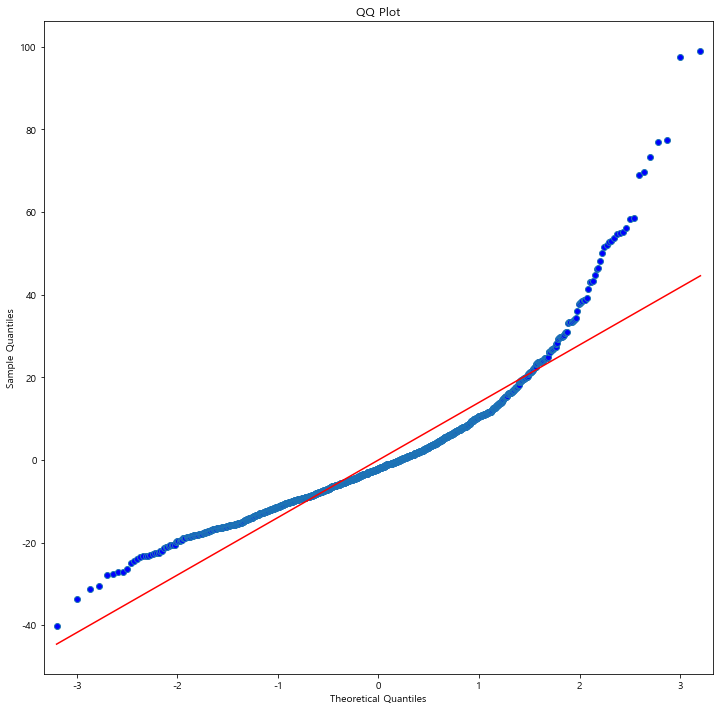

In [31]:
import matplotlib.pyplot as plt
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

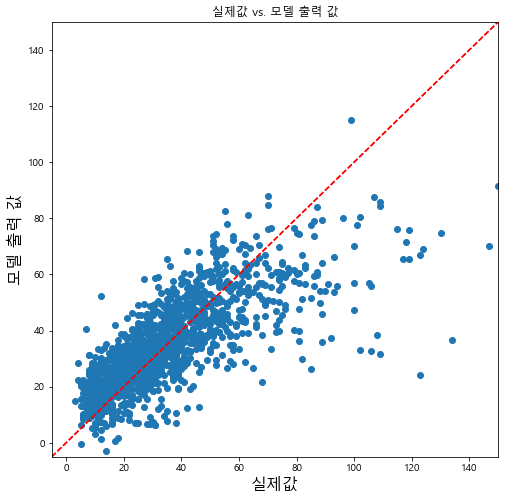

In [32]:
plt.rc('font', family='Malgun Gothic')
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8, 8))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 150], [-5, 150], ls="--", c='red')
plt.plot([-5, 150], [-5, 150], ls="--", c='red')

plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5, 150)
plt.ylim(-5, 150)
plt.show()

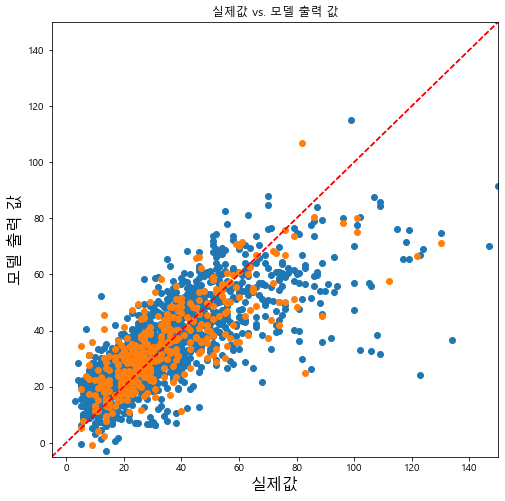

In [33]:
plt.rc('font', family='Malgun Gothic')
y_train_pred = model_trained.fittedvalues
y_test_pred = model_trained.predict(x_test)

plt.figure(figsize=(8, 8))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred, label='train')
plt.scatter(y_test, y_test_pred, label='test')
plt.plot([-5, 150], [-5, 150], ls="--", c='red')
plt.plot([-5, 150], [-5, 150], ls="--", c='red')

plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5, 150)
plt.ylim(-5, 150)
plt.show()

In [37]:
Y = 0
X1,X2,X3,X4,X6,X7 = 0.005,0.073,1.4,0.006,0,0.9
Y = -45.349706 + 399.672027*X1 + 410.157656*X2 + 76.906166*X3+ 2400.227944*X4 -0.116774*X6 + 6.298391*X7
print(Y)
print(Y**(1/5))

114.328714987
2.580067477848756


In [38]:
Y = 0
X1,X2,X3,X4,X6,X7 = 0.024, 0.015, 0.4, 0.003, 0.6, 3.5
Y = -45.349706 + 399.672027*X1 + 410.157656*X2 + 76.906166*X3+ 2400.227944*X4 -0.116774*X6 + 6.298391*X7
print(Y)
print(Y**(1/5))

30.33224182
1.9787043199674461
